<a href="https://colab.research.google.com/github/duspic/RubiksCubeNumpy/blob/main/Rubik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make a Rubik's cube representation in tensors

In [1]:
import numpy as np

In [2]:
one_side = np.zeros((3,3), dtype='uint8')

In [3]:
one_side

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

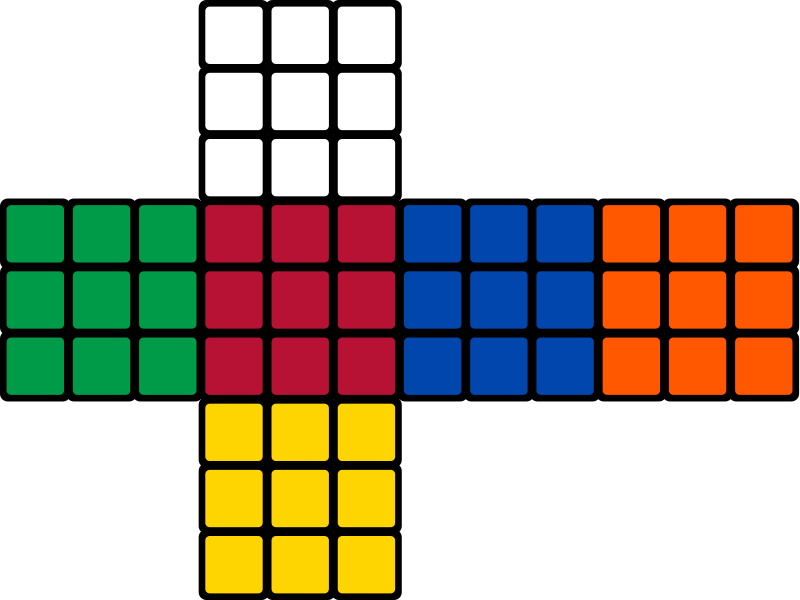

three directions, each with 4 planes

x-y
y-z
x-z

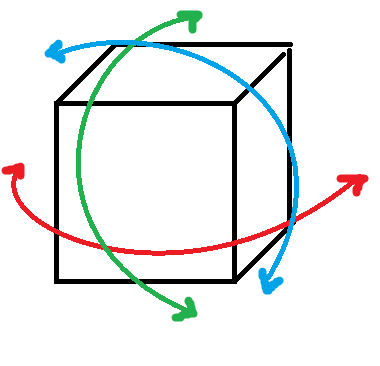

In [ ]:
# make 6 sides separately, than make 3 direction tensors containing the sides in order

In [ ]:
  # white -> 0
    # yellow -> 1
    # orange -> 2
    # red -> 3
    # green -> 4
    # blue -> 5

    # x 0 x x
    # 4 3 5 2
    # x 1 x x

    # aranged so that 1 is in front

In [53]:
class Rubik():
  def __init__(self):
    self.linedim = 50 # how many px per row width or column height
    self.side_shape = np.array((3,3))*self.linedim
    self.side_0 = np.zeros((self.side_shape), dtype=int)
    self.side_1 = np.zeros((self.side_shape), dtype=int) + 1
    self.side_2 = np.zeros((self.side_shape), dtype=int) + 2
    self.side_3 = np.zeros((self.side_shape), dtype=int) + 3
    self.side_4 = np.zeros((self.side_shape), dtype=int) + 4
    self.side_5 = np.zeros((self.side_shape), dtype=int) + 5

    return

  def rotation_yz(self, direction, col=None):
    '''
    direction -> 1 or -1
    col -> 1,2 or 3
    '''

    affected_sides = np.array([self.side_0, self.side_3, self.side_1, self.side_2])
    rot_tensor = np.stack(affected_sides)

    from_col = (col-1)*self.linedim
    to_col = col*self.linedim

    #rot_tensor[:, :, from_col:to_col] = np.roll(rot_tensor[:, :, from_col:to_col],(3*self.linedim)**2 * direction)
    rot_tensor[:, :, from_col:to_col] = np.roll(rot_tensor[:, :, from_col:to_col], 3*direction, axis=0)
    
    self.side_0, self.side_3, self.side_1, self.side_2 = rot_tensor

    return

  def rotation_xz(self, direction, row=None):
    '''
    direction -> 1 or -1
    row -> 1,2 or 3
    '''

    affected_sides = np.array([self.side_1, self.side_5, self.side_0, self.side_4])
    rot_tensor = np.stack(affected_sides)

    from_row = (row-1)*self.linedim
    to_row = row*self.linedim

    rot_tensor[:,from_row:to_row, :] = np.roll(rot_tensor[:,from_row:to_row, :], 3*direction, axis=0)
    self.side_1, self.side_5, self.side_0, self.side_4 = rot_tensor

    return

  def rotate_left(self, row=None):
    '''
    Rotate row of choice to the left (top row=1, middle=2, bottom=3)
    If no row is chosen, the entire cube is rotated, the right side becomes
    the front.
    '''
    if not row:
      for i in [1,2,3]:
        self.rotation_xz(direction=1, row=i)
    else:
      self.rotation_xz(direction=1, row=row)

    return

  def rotate_right(self, row=None):
    '''
    Rotate row of choice to the right (top row=1, middle=2, bottom=3)
    If no row is chosen, the entire cube is rotated, the left side becomes
    the front.
    '''
    if not row:
      for i in [1,2,3]:
        self.rotation_xz(direction=-1, row=i)
    else:
      self.rotation_xz(direction=-1, row=row)

    return

  def rotate_up(self, col=None):
    '''
    Rotate column of choice upwards (left column=1, middle=2, right=3)
    If no column is chosen, the entire cube is rotated, the down side becomes
    the front.
    '''

    if not col:
      for i in [1,2,3]:
        self.rotation_yz(direction=1, col=i)
    else:
      self.rotation_yz(direction=1, col=col)

    return

  def rotate_down(self, col=None):
    '''
    Rotate column of choice downwards (left column=1, middle=2, right=3)
    If no column is chosen, the entire cube is rotated, the upper side becomes
    the front.
    '''

    if not col:
      for i in [1,2,3]:
        self.rotation_yz(direction=-1, col=i)
    else:
      self.rotation_yz(direction=-1, col=col)

    return


  def visualize(self):
    # white -> 0
    # yellow -> 1
    # orange -> 2
    # red -> 3
    # green -> 4
    # blue -> 5
    
    empty = np.zeros_like(self.side_0) -1

    first_row = np.hstack((empty, self.side_0, empty, empty))
    second_row = np.hstack((self.side_4, self.side_3, self.side_5, self.side_2))
    third_row = np.hstack((empty, self.side_1, empty, empty))
    res = np.vstack((first_row, second_row, third_row))

    res = self.convert_to_colors(res)

    return res

  def convert_to_colors(self, num_array):
    # white  rgb(255,255,255)
    #	yellow rgb(255,255,0)
    # orange rgb(255,165,0)
    # red    rgb(255,0,0)
    # green  rgb(0,255,0)
    # blue   rgb(0,0,255)

    layer_1 = num_array.copy()
    layer_2 = num_array.copy()
    layer_3 = num_array.copy()

    white_mask = np.where(num_array==0)
    yellow_mask = np.where(num_array==1)
    orange_mask = np.where(num_array==2)
    red_mask = np.where(num_array==3)
    green_mask = np.where(num_array==4)
    blue_mask = np.where(num_array==5)
    black_mask = np.where(num_array==255)

    # white
    layer_1[white_mask] = layer_2[white_mask] = layer_3[white_mask] = 255

    # yellow
    layer_1[yellow_mask] = layer_2[yellow_mask] = 255
    layer_3[yellow_mask] = 0

    # orange
    layer_1[orange_mask] = 255
    layer_2[orange_mask] = 165
    layer_3[orange_mask] = 0

    # red
    layer_1[red_mask] = 255
    layer_2[red_mask] = layer_3[red_mask] = 0

    # green
    layer_1[green_mask] = layer_3[green_mask] = 0
    layer_2[green_mask] = 255

    # blue
    layer_1[blue_mask] = layer_2[blue_mask] = 0
    layer_3[blue_mask] = 255

    
    return np.stack((layer_3,layer_2,layer_1),axis=2)




In [54]:
import cv2
from google.colab.patches import cv2_imshow

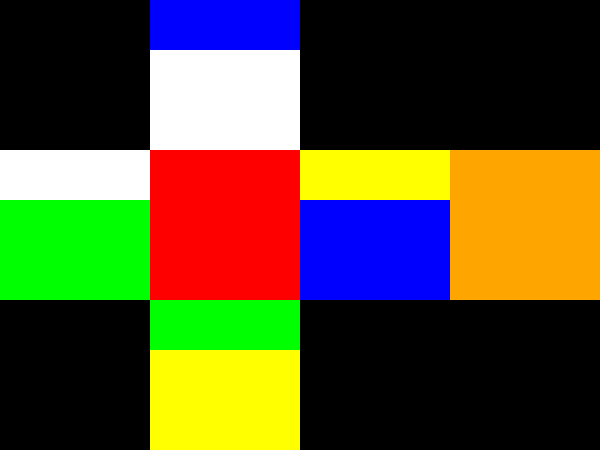

In [55]:
rbk=Rubik()
rbk.rotate_right(1)
pic = rbk.visualize()
cv2_imshow(pic)

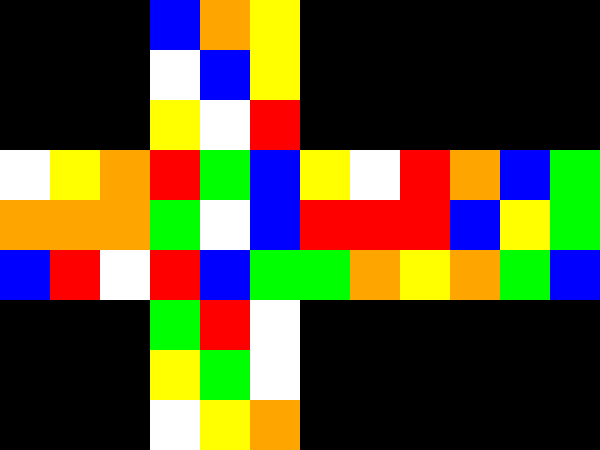

In [35]:
for i in range(4):
  rbk.rotate_left(np.random.choice((1,2,3)))
  rbk.rotate_down(np.random.choice((1,2,3)))
  rbk.rotate_up(np.random.choice((1,2,3)))
  rbk.rotate_right(np.random.choice((1,2,3)))

pic = rbk.visualize()
cv2_imshow(pic)